# AST 4930 Week 7

## Emsemble Methods

### Bagging

Text(0, 0.5, 'Feature 2')

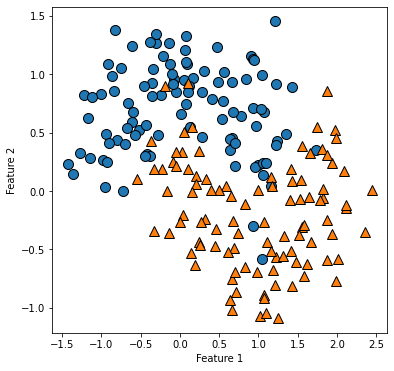

In [1]:
import sklearn
import mglearn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

## generating dataset w/ 200 samples
X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.3, random_state=3)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

### Bootstrap

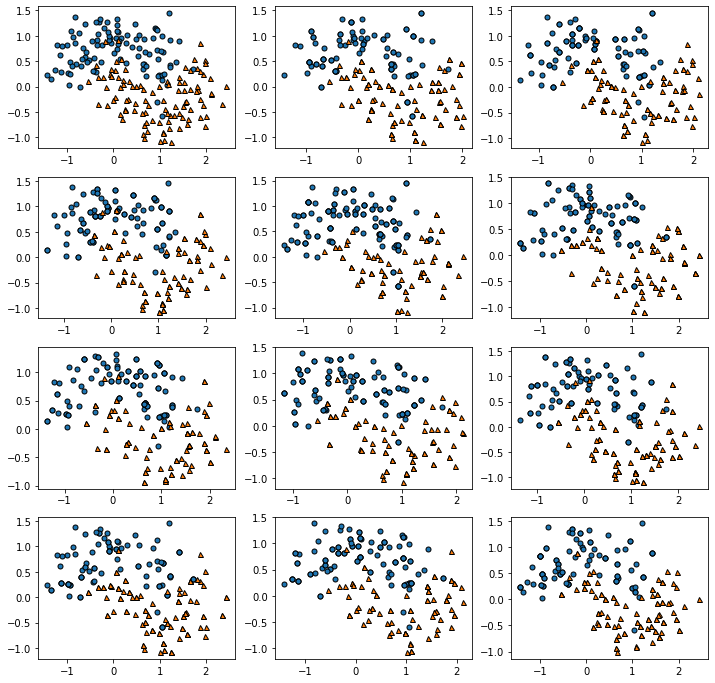

In [2]:
import numpy as np

npanel = 12

fig, axs = plt.subplots(4, 3, figsize=(12, 12))
axs = axs.ravel()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = axs[0], s=5)

for i in np.arange(npanel-1):
    # This is where bootstrap is happening.
    indices_with_replacement = np.random.randint(0, len(X), len(X)) ## select random feature from 0 to end of data points.
    ## manually doing bagging
   # print(indices_with_replacement) ## 200 numbers in array chosen randomly w/ some duplicates
    X_new = X[indices_with_replacement]
    y_new = y[indices_with_replacement]

    mglearn.discrete_scatter(X_new[:, 0], X_new[:, 1], y_new, ax = axs[i+1], s=5)

### Decision boundary

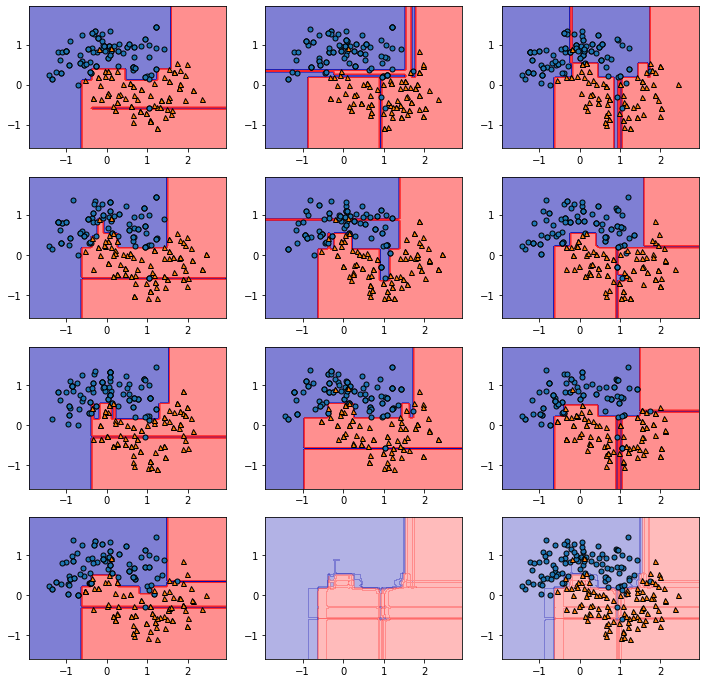

In [3]:
from sklearn.tree import DecisionTreeClassifier

npanel = 12

fig, axs = plt.subplots(4, 3, figsize=(12, 12))
axs = axs.ravel()

xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)

# Array to save the averaged decision boundary
Zavg = np.zeros_like(XX)

for i in np.arange(npanel-2):
    indices_with_replacement = np.random.randint(0, len(X), len(X)) #bootstrapping
    X_new = X[indices_with_replacement]
    y_new = y[indices_with_replacement]
    # DT model with bootstrapped data
    model = DecisionTreeClassifier(random_state=i)
    model.fit(X_new, y_new)
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    Zavg += Z ## array to record entire DT

    axs[i].contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2) ## makinf plot of z
    mglearn.discrete_scatter(X_new[:, 0], X_new[:, 1], y_new, ax = axs[i], s=5)

# Average the decision boundary
Zavg /= npanel ## divide average of z with the number of panels

axs[-1].contourf(XX, YY, Zavg, alpha=0.3, cmap=mglearn.cm2)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = axs[-1], s=5)

axs[-2].contourf(XX, YY, Zavg, alpha=0.3, cmap=mglearn.cm2)

### BaggingClassifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier ## so you don't have to manually bag
# See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## bagging. Can put any estimator, doesn't have to be DT. Can be kNN or SVM
## bagging - improve cavieats of DT (over fitting) Using SVM therre isn;t much we bain from bagging b/c SVM is good at not overfitting
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, ## number of estimator - number of bootstrap
                            max_samples=1.0, bootstrap=True, random_state=0) ## maz_samples - has same numberr of datapoints as origonal. If u use .5 new data would be only 100

bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.96

In [5]:
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test, y_test)

0.82

if you compare scores, DT w/ bagging has much higher score

### Decision boundary

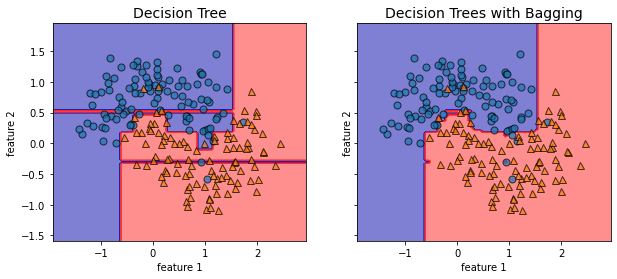

In [6]:
def plot_decision_boundary(model, X, y, alpha=0.5):
    xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
    yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

    XX, YY = np.meshgrid(xx, yy)
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    plt.contourf(XX, YY, Z, alpha=alpha, cmap=mglearn.cm2)

    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, s=7, alpha=0.7)

    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

## plotting single DT vs DT w/ bagging
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)

plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)

plt.show()

### Random Forests

Text(0, 0.5, 'feature 2')

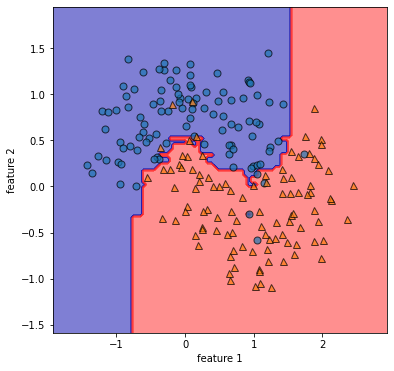

In [7]:
from sklearn.ensemble import RandomForestClassifier 
#See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

model = RandomForestClassifier(n_estimators=500, oob_score=True) ## diff type of modle
## if you want to use out of bag eval -> oob_score = True
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 6))

xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)
Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

plt.contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, s=7, alpha=0.7)

plt.xlabel('feature 1')
plt.ylabel('feature 2')
    

Random forest and DT w/ bagging basically the same

### Two scores

In [8]:
## use training dataset to evaluate the model
## split
model = RandomForestClassifier(n_estimators=500, oob_score=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.96

In [9]:
## use same model but now fit entire dataset
## we know which points aren;t included  in bootstrap dataset so we can use the model.00b_score to see
model = RandomForestClassifier(n_estimators=500, oob_score=True)
model.fit(X, y)
model.oob_score_

0.93

score reasonably close to using orig scoring 

### Let's try Random Forests on the MNIST data we used in Week 5.

In [10]:
# You need to select Tensorflow kernel to load the data
from tensorflow.keras.datasets import mnist

# Load the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

NotFoundError: /apps/tensorflow/2.4.1.cuda11/lib/python3.8/site-packages/tensorflow/core/kernels/libtfkernel_sobol_op.so: undefined symbol: _ZN10tensorflow6thread10ThreadPool26TransformRangeConcurrentlyExxRKSt8functionIFvxxEE

###  We will take 1/50 of the data.

In [4]:
X_train = X_train[::50]
y_train = y_train[::50]
X_test = X_test[::50]
y_test = y_test[::50]

NameError: name 'X_train' is not defined

In [2]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.title('The number is = {}'.format(y_train[0]))

NameError: name 'X_train' is not defined

### We will "flatten" the data. By flattening, we convert a 2d array with 28x28 elements to an 1d array with 784 elements.

In [13]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

### Let's check the performance of a single DT.

### TODO: write a script that finds the DT model using hyperparameter optimization.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

## see how good or bad single DT does for this example
param_grid = {}

grid_search = GridSearchCV()
grid_search.fit()

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


### Q: What is the test score?

### TODO: Now let's check out how Random Forests perform. Compare the score obtained with test dataset and the OOB score

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(N_estimators=500)
model.fit(X_train, y_train)
model.oob_score_

### Q: What are the test scores and how does that compare with the single DT score?